# Introduction to Python, Numpy, Pandas, and Matplotlib


This lab will detail some pythonic equivalents to the `Introduction to R` lab of [ISL](http://faculty.marshall.usc.edu/gareth-james/ISL/).

This lab **will not** be an exhaustive tutorial of Python, Numpy, Pandas, or Matplotlib -- I myself still have plenty to learn about each :)

However, I hope that by the end of this lab you'll know how to do in python-land the same things the first lab of ISL does in R-land. Thanks, and good luck!

## Basic Commands

To create a list of numbers, we can use the syntax [1,2,3...] and optionally save this list to a variable

In [1]:
myList = [1,3,2,5]
myList

[1, 3, 2, 5]

* note that in a jupyter notebook, the last expression in a code cell will get printed

You can use the help() built-in python function for help, or check the python manual for guidance if you need.

In [2]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



Where R supports element-by-element vector addition out of the box, python's default for list addition is to concatenate the two lists

In [3]:
[1,3,5] + [2,4,6]

[1, 3, 5, 2, 4, 6]

If we instead want `[a,b,c] + [d,e,f]` to return `[a+d, b+e, c+f]`, we can use numpy arrays.

In [4]:
# import the numpy library, and alias it as np
import numpy as np

# instantiate a numpy array by wrapping a list in np.array()
first = np.array([1,3,5])
second = np.array([2,4,6])

firstPlusSecond = first + second
firstPlusSecond

array([ 3,  7, 11])

You can check the length of python lists using `len()` or numpy arrays using `len()` or alternatively `.shape()`

In [5]:
print(len([1,2,3]))
print(np.array([4,2,4,2,4]).shape) 

3
(5,)


Generally, numpy arrays need to be the same length to be added together.

In [6]:
np.array([1,3,5]) + np.array([2,4])

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

This isn't the whole story -- numpy will try to make sense of operations you give it.
But in general, you'll want to add together arrays with matching shapes.
If you want to see a result I found interesting, try uncommenting the last line of the following code cell

In [7]:
first = np.array([1,1,1]) # sort of like the matrix row [1,1,1]
second = np.array([[2], [3], [4]]) # this is more like a column
print('first:')
print(first)
print(first.shape)

print('-----------')
print('second:')
print(second)
print(second.shape)
#first + second

first:
[1 1 1]
(3,)
-----------
second:
[[2]
 [3]
 [4]]
(3, 1)


In R, the `ls()` function will list all the objects saved in a session.
Python has similar commands in `dir()`, `locals()`, and `globals()`

(figure out a better way to word this)
However, these also list python global objects, not just user-defined ones. 

Because this is a Jupyter notebook, we can use the `%who` magic to see only user-defined objects

In [8]:
%who

first	 firstPlusSecond	 myList	 np	 second	 


I don't know if it's all that [pythonic](https://docs.python-guide.org/writing/style/) to "undeclare" your variables, but you're certainly allowed to using `del`.
I haven't been able to find an equivalent to R's removal of all user-defined objects, but I'm sure it can be done. (the mathematician in me is always happy to say ["a solution exists!"](https://users.cs.northwestern.edu/~riesbeck/mathphyseng.html#fire) and walk away)

In [9]:
del myList
myList

NameError: name 'myList' is not defined

To create a matrix in numpy, you'll still use np.array, but you'll pass it an array of arrays.
* there is a numpy.matrix class, however numpy explicitly suggests not using it going forward

In [10]:
matrix = np.array([[1,2], [3, 5]])
matrix

array([[1, 2],
       [3, 5]])

Python and R are similar in that their functions can be called with named arguments.
Calling a function without named arguments (which is all we've seen in this notebook so far)
causes the arguments to be used positionally. 

    ex. np.array() takes a handful of arguments, but the first two are object and dtype
    object is the "array-like" thing we want to put into the numpy array, and dtype specifies the type we want for our array
    by leaving off the name in the above calls, np.array([1,2,3]) calls the function with [1,2,3] as the "object" argument.
    Not specifying the dtype argument causes it to default to whatever numpy deems fit -- be sure to read the results from
    help(np.array) if you need.
    We can use these named arguments to supply whichever arguments we want, in whatever order we want

In [11]:
# normally object is the first arg and dtype is second. flipping them around as is will throw an error
np.array(int, [1,2,3])

TypeError: data type not understood

In [12]:
# we can accomplish this using named arguments
np.array(dtype=int, object=[1,2,3])

array([1, 2, 3])

Numpy provides plenty of functions that can be used to modify arrays.
np.sqrt(array) will return a numpy array with the square root of each original element
np.power(array, exp) will return a numpy array with the `exp` power of each element

In [13]:
print(np.sqrt([[81, 64], [49, 36]]))
print('-----------')
print(np.power([2,4,6], 2))

[[9. 8.]
 [7. 6.]]
-----------
[ 4 16 36]


the function `np.random.normal(loc, scale, size)` generates a vector of random normal variables, with third argument `size` the sample size.

`loc` specifies the mean of the distribution, and `scale` specifies the standard deviation.
Note that every time we call this function, we'll get a different array.

In [14]:
np.random.normal(size=50)

array([ 0.27332388, -0.47360261, -0.42570049, -0.82254162, -0.42984462,
        0.17414193,  0.30772489,  0.22574226, -1.49772991, -0.06315623,
        1.29767236,  0.08354835,  0.98248736,  0.83552879, -1.87953804,
       -0.47642488,  0.45302999,  0.1366185 ,  0.38664782, -0.25522089,
       -0.90124729, -0.2916447 , -1.4386113 , -0.71843088,  1.23657322,
        0.35410008, -0.53919505, -1.28153137,  0.68897034,  0.63422401,
       -1.61792102,  0.94896048,  0.15959708,  1.2974455 , -0.11329172,
        0.69945283, -0.07019648,  0.24168251, -0.04966681, -0.62609149,
        0.93132874, -0.51392046,  0.19581909, -0.26553944,  0.12583752,
       -1.87692876, -0.70976539,  1.36124744,  0.49695864, -1.14021581])

In [15]:
# we can use the corrcoef function to compute the correlation between two arrays
x = np.random.normal(size=50)
y = x + np.random.normal(loc=50, scale=0.1, size=50)
# the [0, 1] will explained in the `Indexing` section of this notebook
np.corrcoef(x,y)[0, 1] # correlation should be in the ballpark of 0.95

0.9970810498445307

We may want our code to reproduce the exact same set of "random" numbers when we use random.normal

We can do this by setting a random seed.
- Note this doesn't mean calling np.random.normal two times in a row will produce the exact same array. Instead it means the next time this code is run, x will be the same as it was the first time, as will y.

In [16]:
np.random.seed(28)

x = np.random.normal(size=10) # now the first element of x will always be 0.44633238

y = np.random.normal(size=10) # now the first element of y will always be 0.25350786

# now every time this notebook is run, 
# x will be the same as it was the first time I ran it,
# and y will be the same as it was the first time I ran it.
# x and y, however, will not be the same:
x == y

array([False, False, False, False, False, False, False, False, False,
       False])

We can use np.mean, np.var, and np.std to compute the respective mean, variance, and standard deviation of an array

In [17]:
np.random.seed(15)
x = np.random.normal(loc=15, scale=10, size=1000)
print(np.mean(x)) # turns out close to 15, like we expect, since our array is centered around 15
print(np.std(x)) # turns out close to 10
print(np.var(x)) # turns out close to 100, the square of our standard deviation

14.69387978301393
9.97661674803756
99.53288173722356


## Graphics

There are plenty of libraries out there that will help you plot data in python, but here we'll focus on the very popular Matplotlib.pyplot
You'll commonly see it aliased as `plt`

The `plot` function can be used to draw a line chart, while the `scatter` function draws a scatter plot.
There are tons of other functions Matplotlib provides, be sure to investigate it, as well as other plotting libraries!

`Seaborn` is another popular python plotting pick.

- TODO: explain list comprehension

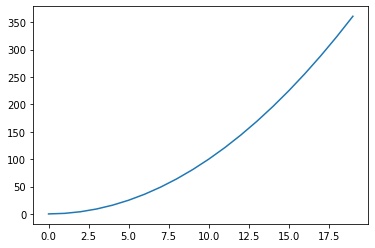

In [24]:
import matplotlib.pyplot as plt

xs = list(range(20))

# this is called a list comprehension, it's a pythonic way of populating an array, frequently from another iterable
ys = [x**2 for x in xs]
plt.plot(xs, ys)

If you want to spruce up your plots (and you should, you deserve it) matplotlib provides options to change the colors and styles in your plots, and functions like `title` to describe your plot.

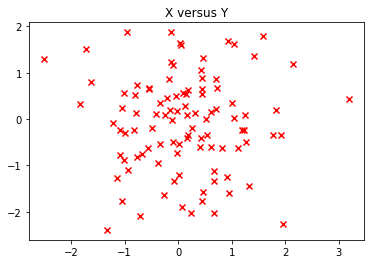

In [30]:
np.random.seed(23)

x = np.random.normal(size=100)
y = np.random.normal(size=100)

plt.title('X versus Y')
plt.scatter(x, y, c='red', marker='x')

I couldn't hope to detail all the things matplotlib will let you do to your plots, or how to do them. Documentation is your friend here!

All I ask is that you don't break the rule I've already broken twice now:

**[Always label your axes](https://flowingdata.com/2012/06/07/always-label-your-axes/)**

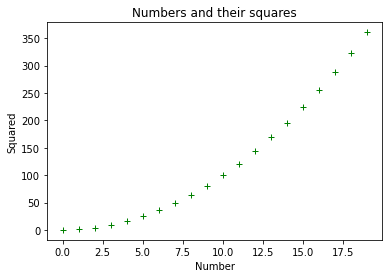

In [37]:
plt.xlabel('Number')
plt.ylabel('Squared')
plt.title('Numbers and their squares')
plt.plot(xs, ys, 'g+')